In [2]:
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

In [3]:
#
import math
import os
from pathlib import Path

In [4]:
columns_ordered = ([
'duration','protocol_type','service','flag','src_bytes','dst_bytes',
'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login',
'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
])
cat_cols = ['protocol_type', 'service', 'flag']
cont_cols = [
    'duration','src_bytes','dst_bytes','wrong_fragment',
    'urgent','hot', 'num_failed_logins','num_compromised','num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds', 'count','srv_count','serror_rate',
    'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
    'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
]
disc_cols = ['land', 'logged_in','root_shell','su_attempted', 'is_host_login','is_guest_login']
columns = [*cat_cols, *cont_cols, *disc_cols]
labels_cols = ['attack', 'attack_type']
len(columns)

41

In [5]:
attacks_types = {
  'normal': 'normal',
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l',
}

attack_families = ['normal', 'dos', 'u2r', 'r2l', 'probe']

In [6]:
# Total rows: 494021 (This is 10% data)
root_path = Path(os.path.abspath(""))
data_path = os.path.join(root_path.parent.parent, 'data', 'kdd_cup','KDD_Data', 'kddcup_data.csv')
# df = pd.read_csv(data_path, names=[*columns,'attack'], nrows=1000)
df = pd.read_csv(data_path, names=[*columns_ordered,'attack'])
df['attack'] = df['attack'].apply(lambda r: r[:-1])
df['attack_type'] = df['attack'].apply(lambda r:attacks_types[r])
df.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        215      45076     0   
1         0           tcp    http   SF        162       4528     0   
2         0           tcp    http   SF        236       1228     0   
3         0           tcp    http   SF        233       2032     0   
4         0           tcp    http   SF        239        486     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                     0.0   
1               0       0    0  ...                     1.0   
2               0       0    0  ...                     1.0   
3               0       0    0  ...                     1.0   
4               0       0    0  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.00   
1                     0.0                         1.00   
2                     0.0                         0.50   
3                     0.0                         0.33   
4                     0.0                         0.25   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

   attack  attack_type  
0  normal       normal  
1  normal       normal  
2  normal       normal  
3  normal       normal  
4  normal       normal  

[5 rows x 43 columns]

## Categorical columns

In [35]:
df.describe(include=['category'])

protocol_type  service     flag   attack attack_type
count        4898431  4898431  4898431  4898431     4898431
unique             3       70       11       23           5
top             icmp    ecr_i       SF    smurf         dos
freq         2833545  2811660  3744328  2807886     3883370

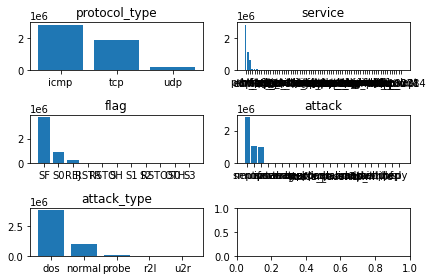

In [37]:
all_cat_cols = [*cat_cols, *labels_cols]
cols = 2
rows = math.ceil(len(all_cat_cols) / 2)
fig, axs = plt.subplots(rows, cols)

for (i, cat_col) in enumerate(all_cat_cols):
    g_c = i % cols
    g_r = int(i /cols)
    vc = df[cat_col].value_counts()
    axs[g_r, g_c].bar(vc.index, vc.values)
    axs[g_r, g_c].set_title(cat_col)
fig.tight_layout()

<AxesSubplot:>

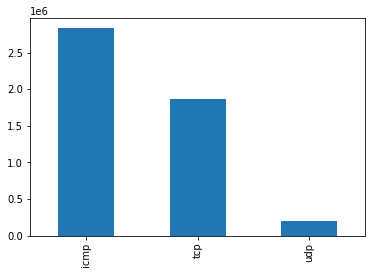

In [38]:
# Protocol type
df[cat_cols[0]].value_counts().plot(kind='bar')

<AxesSubplot:>

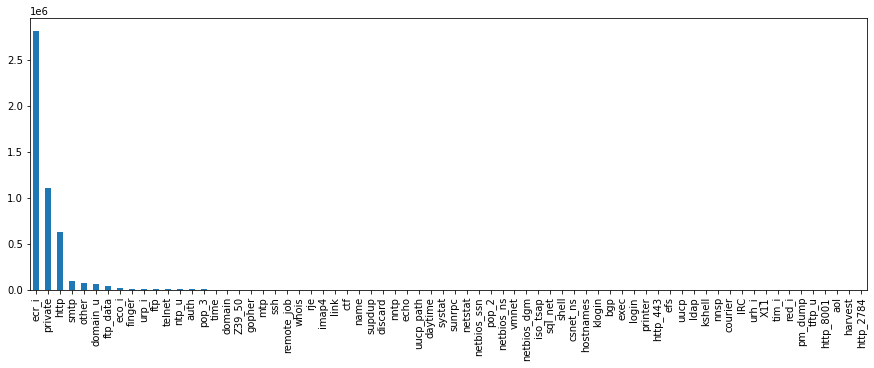

In [39]:
# Service
df[cat_cols[1]].value_counts().plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

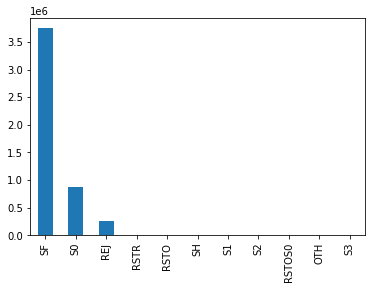

In [40]:
# Flag
df[cat_cols[2]].value_counts().plot(kind='bar')

<AxesSubplot:>

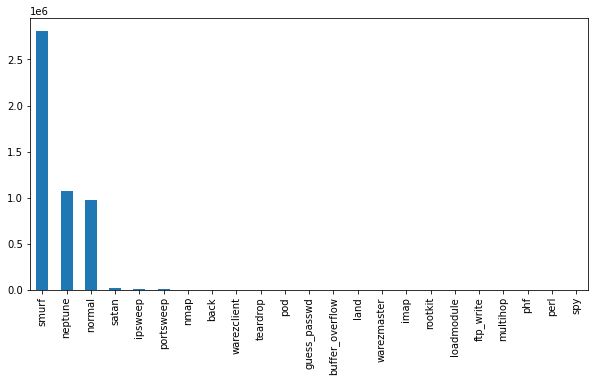

In [41]:
# Attack
df[labels_cols[0]].value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

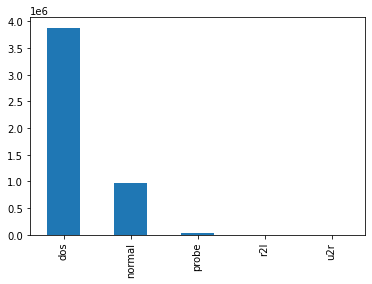

In [42]:
# Attack Type
df[labels_cols[1]].value_counts().plot(kind='bar')

## Numerical columns

In [43]:
df[cont_cols].describe(include=['number'])

duration     src_bytes     dst_bytes  wrong_fragment        urgent  \
count  4.898431e+06  4.898431e+06  4.898431e+06    4.898431e+06  4.898431e+06   
mean   4.834243e+01  1.834621e+03  1.093623e+03    6.487792e-04  7.961733e-06   
std    7.233298e+02  9.414311e+05  6.450123e+05    4.285434e-02  7.215084e-03   
min    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
25%    0.000000e+00  4.500000e+01  0.000000e+00    0.000000e+00  0.000000e+00   
50%    0.000000e+00  5.200000e+02  0.000000e+00    0.000000e+00  0.000000e+00   
75%    0.000000e+00  1.032000e+03  0.000000e+00    0.000000e+00  0.000000e+00   
max    5.832900e+04  1.379964e+09  1.309937e+09    3.000000e+00  1.400000e+01   

                hot  num_failed_logins  num_compromised      num_root  \
count  4.898431e+06       4.898431e+06     4.898431e+06  4.898431e+06   
mean   1.243766e-02       3.205108e-05     8.088304e-03  1.293496e-02   
std    4.689782e-01       7.299408e-03     3.856481e+00  3.938075e+00   
min    0.000000e+00       0.000000e+00     0.000000e+00  0.000000e+00   
25%    0.000000e+00       0.000000e+00     0.000000e+00  0.000000e+00   
50%    0.000000e+00       0.000000e+00     0.000000e+00  0.000000e+00   
75%    0.000000e+00       0.000000e+00     0.000000e+00  0.000000e+00   
max    7.700000e+01       5.000000e+00     7.479000e+03  7.468000e+03   

       num_file_creations  ...  dst_host_count  dst_host_srv_count  \
count        4.898431e+06  ...    4.898431e+06        4.898431e+06   
mean         1.188748e-03  ...    2.329811e+02        1.892142e+02   
std          1.241857e-01  ...    6.402094e+01        1.059128e+02   
min          0.000000e+00  ...    0.000000e+00        0.000000e+00   
25%          0.000000e+00  ...    2.550000e+02        4.900000e+01   
50%          0.000000e+00  ...    2.550000e+02        2.550000e+02   
75%          0.000000e+00  ...    2.550000e+02        2.550000e+02   
max          4.300000e+01  ...    2.550000e+02        2.550000e+02   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count            4.898431e+06            4.898431e+06   
mean             7.537132e-01            3.071111e-02   
std              4.111860e-01            1.085432e-01   
min              0.000000e+00            0.000000e+00   
25%              4.100000e-01            0.000000e+00   
50%              1.000000e+00            0.000000e+00   
75%              1.000000e+00            4.000000e-02   
max              1.000000e+00            1.000000e+00   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                 4.898431e+06                 4.898431e+06   
mean                  6.050520e-01                 6.464107e-03   
std                   4.809877e-01                 4.125978e-02   
min                   0.000000e+00                 0.000000e+00   
25%                   0.000000e+00                 0.000000e+00   
50%                   1.000000e+00                 0.000000e+00   
75%                   1.000000e+00                 0.000000e+00   
max                   1.000000e+00                 1.000000e+00   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count          4.898431e+06              4.898431e+06          4.898431e+06   
mean           1.780911e-01              1.778859e-01          5.792780e-02   
std            3.818382e-01              3.821774e-01          2.309428e-01   
min            0.000000e+00              0.000000e+00          0.000000e+00   
25%            0.000000e+00              0.000000e+00          0.000000e+00   
50%            0.000000e+00              0.000000e+00          0.000000e+00   
75%            0.000000e+00              0.000000e+00          0.000000e+00   
max            1.000000e+00              1.000000e+00          1.000000e+00   

       dst_host_srv_rerror_rate  
count              4.898431e+06  
mean               5.765941e-02  
std                2.309777e-01  
min                0.00000

### Discrete columns distributions

land
0.0    4898403
1.0         28
Name: land, dtype: int64
logged_in
0.0    4195364
1.0     703067
Name: logged_in, dtype: int64
root_shell
0.0    4898097
1.0        334
Name: root_shell, dtype: int64
su_attempted
0.0    4898321
2.0         70
1.0         40
Name: su_attempted, dtype: int64
is_host_login
0.0    4898429
1.0          2
Name: is_host_login, dtype: int64
is_guest_login
0.0    4894340
1.0       4091
Name: is_guest_login, dtype: int64


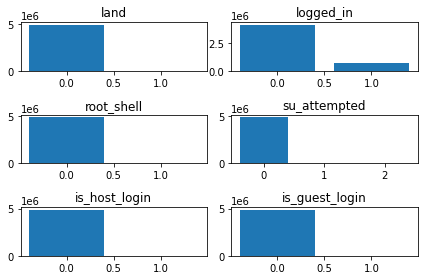

In [34]:
cols = 2
rows = math.ceil(len(disc_cols) / 2)
fig, axs = plt.subplots(rows, cols)

for (i, disc_col) in enumerate(disc_cols):
    g_c = i % cols
    g_r = int(i /cols)
    vc = df[disc_col].value_counts()
    axs[g_r, g_c].bar(vc.index, vc.values)
    axs[g_r, g_c].set_title(disc_col)
    print(disc_col)
    print(vc)
fig.tight_layout()

### Continuous distributions

In [9]:
cont_cols_1 = cont_cols[0:len(cont_cols)//2]
cont_cols_2 = cont_cols[len(cont_cols_1):]
print(len(cont_cols))
print(len(cont_cols_1))
print(len(cont_cols_2))
assert [*cont_cols_1, *cont_cols_2] == cont_cols
[*cont_cols_1, *cont_cols_2] == cont_cols

32
16
16


True

/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


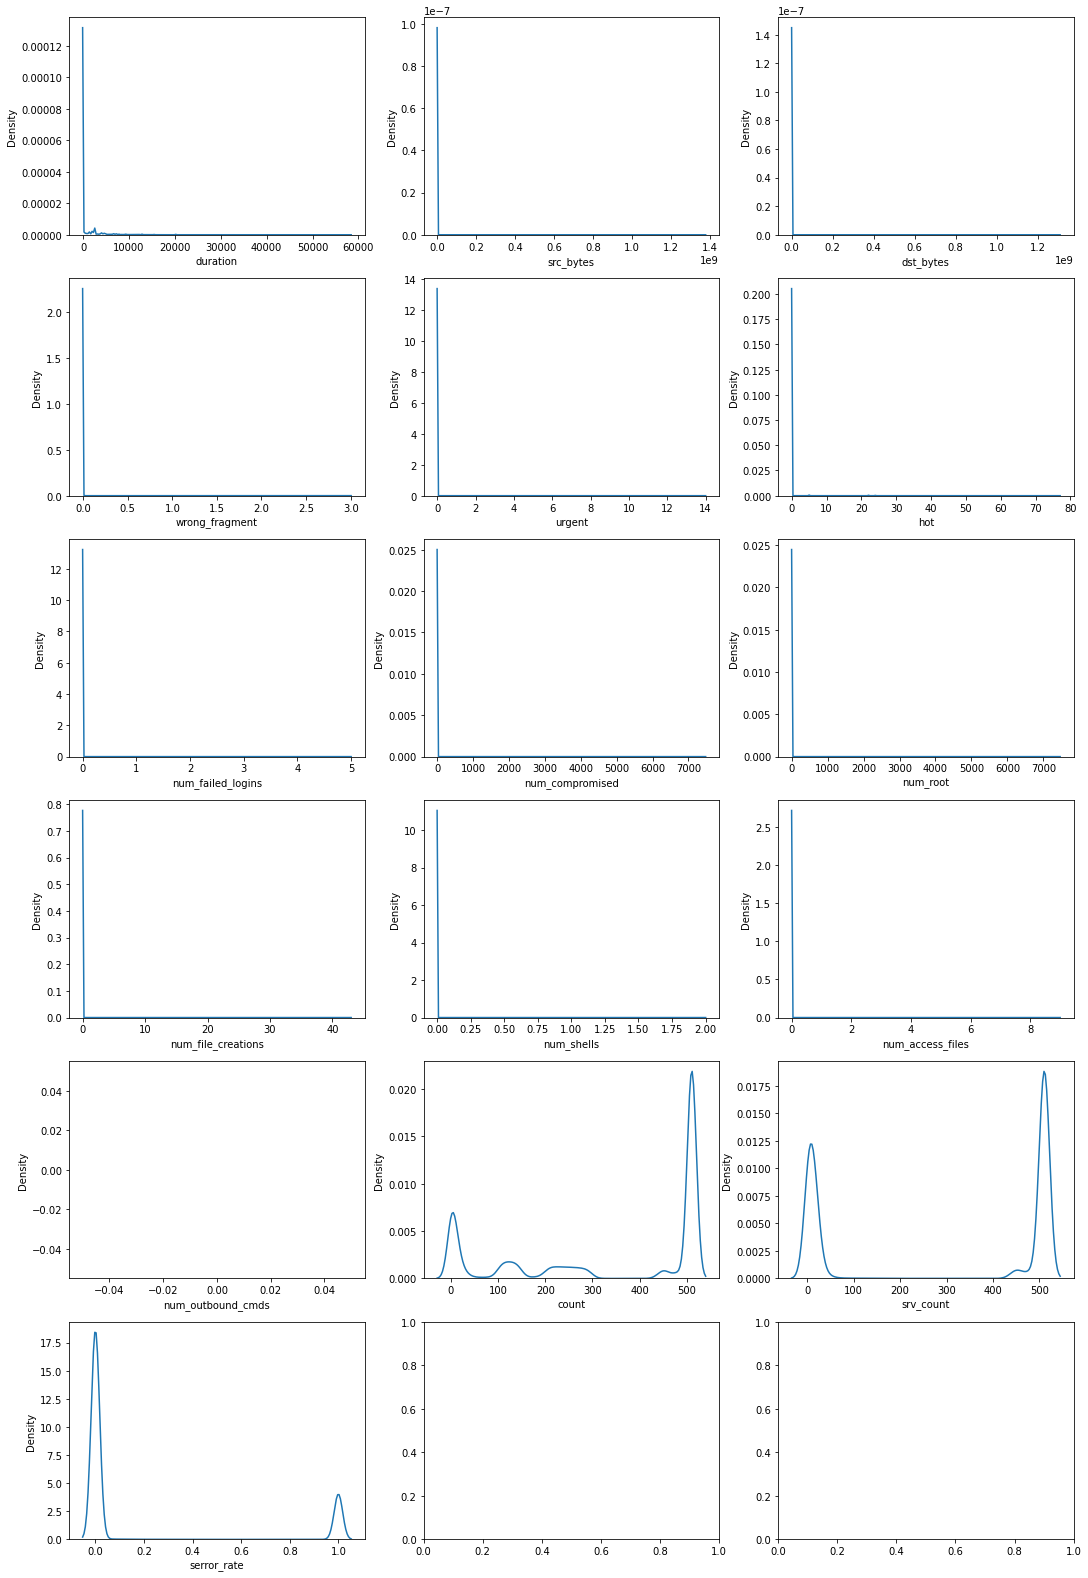

In [12]:
cols = 3
rows = math.ceil(len(cont_cols_1) / cols)
fig, axs = plt.subplots(nrows=rows,ncols=cols,figsize=(18,28))

for i, nc in enumerate(cont_cols_1):
    _col = i % cols
    _row = int(i / cols)
    sns.kdeplot(data=df, x=nc, ax=axs[_row][_col])
    # sns.histplot(data=df, x=nc, ax=axs[_row][_col])
plt.show()

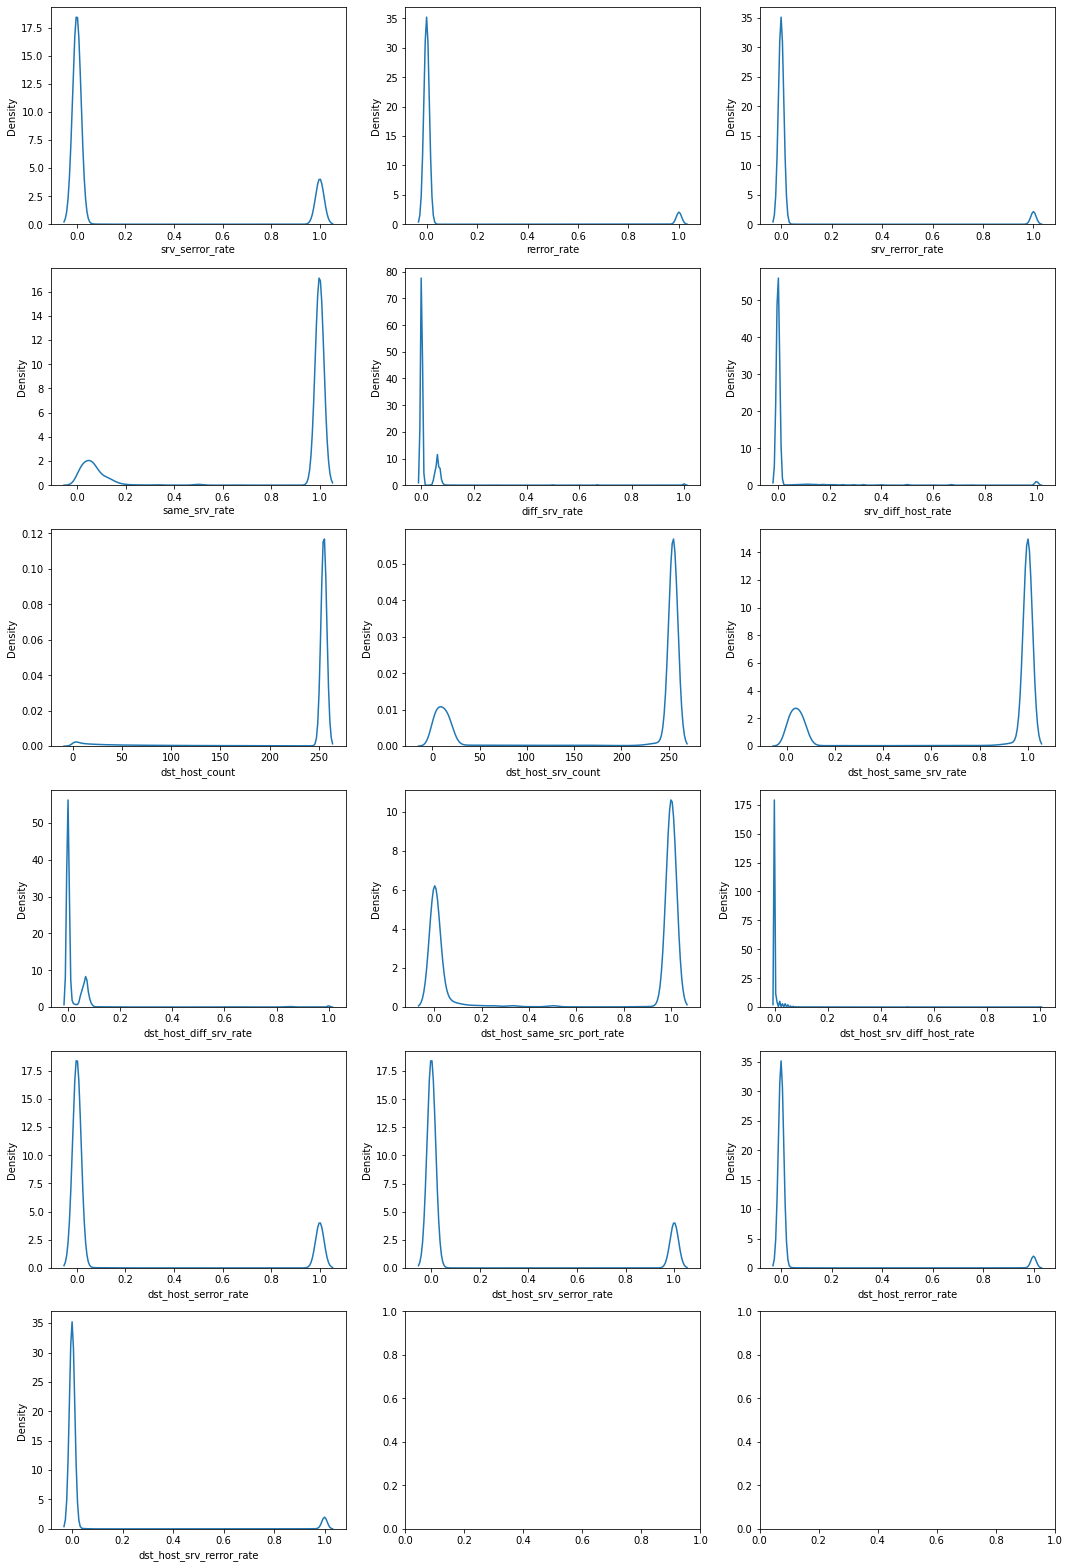

In [13]:
cols = 3
rows = math.ceil(len(cont_cols_2) / cols)
fig, axs = plt.subplots(nrows=rows,ncols=cols,figsize=(18,28))

for i, nc in enumerate(cont_cols_2):
    _col = i % cols
    _row = int(i / cols)
    sns.kdeplot(data=df, x=nc, ax=axs[_row][_col])
    # sns.histplot(data=df, x=nc, ax=axs[_row][_col])
plt.show()

### Correlations

In [34]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

normal_df = df[df['attack_type'] == 'normal']
attack_df_dos = df[df['attack_type'] == 'dos']
attack_df_probe = df[df['attack_type'] == 'probe']
attack_df_r2l = df[df['attack_type'] == 'r2l']
attack_df_u2r = df[df['attack_type'] == 'u2r']

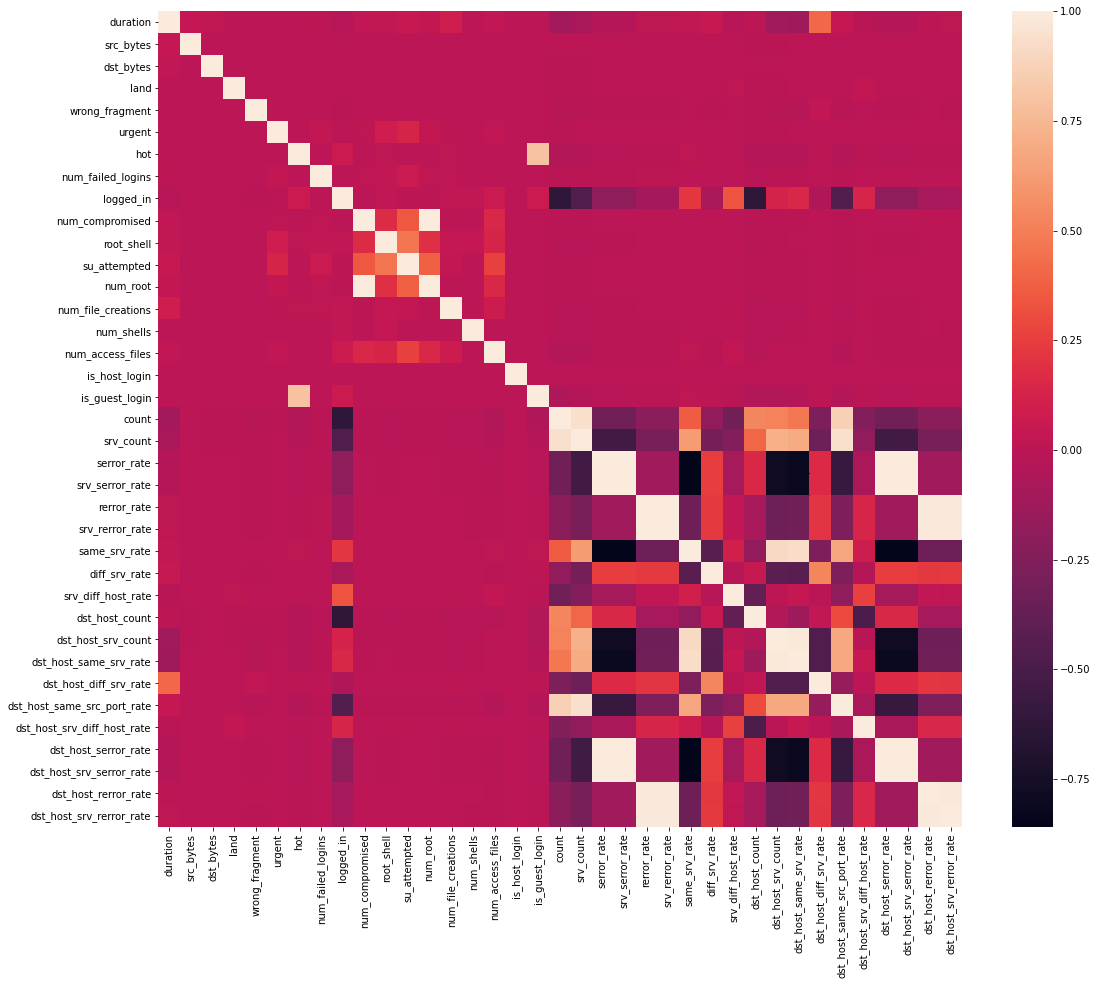

In [35]:
corr = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr)#,annot=True
plt.show()

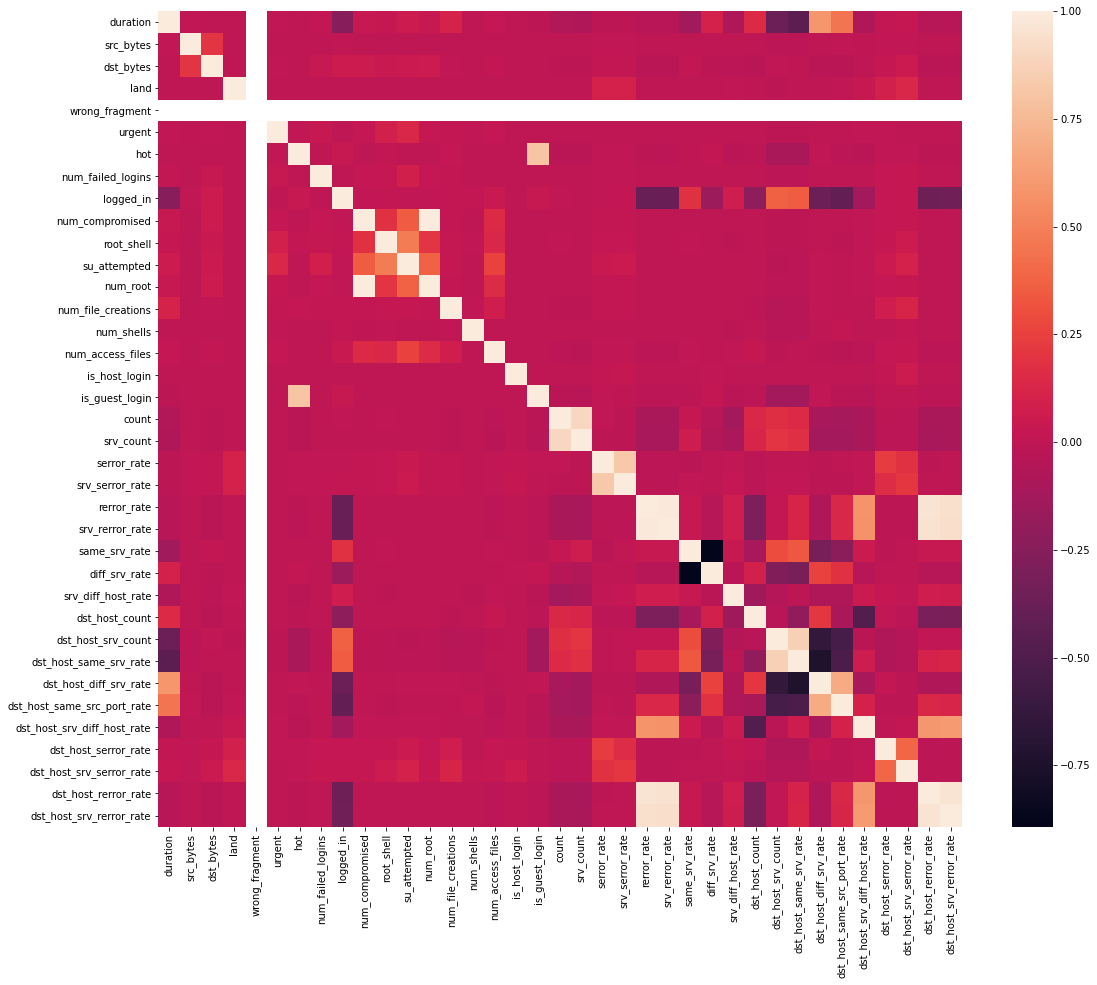

In [36]:
corr = normal_df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr)#,annot=True
plt.show()

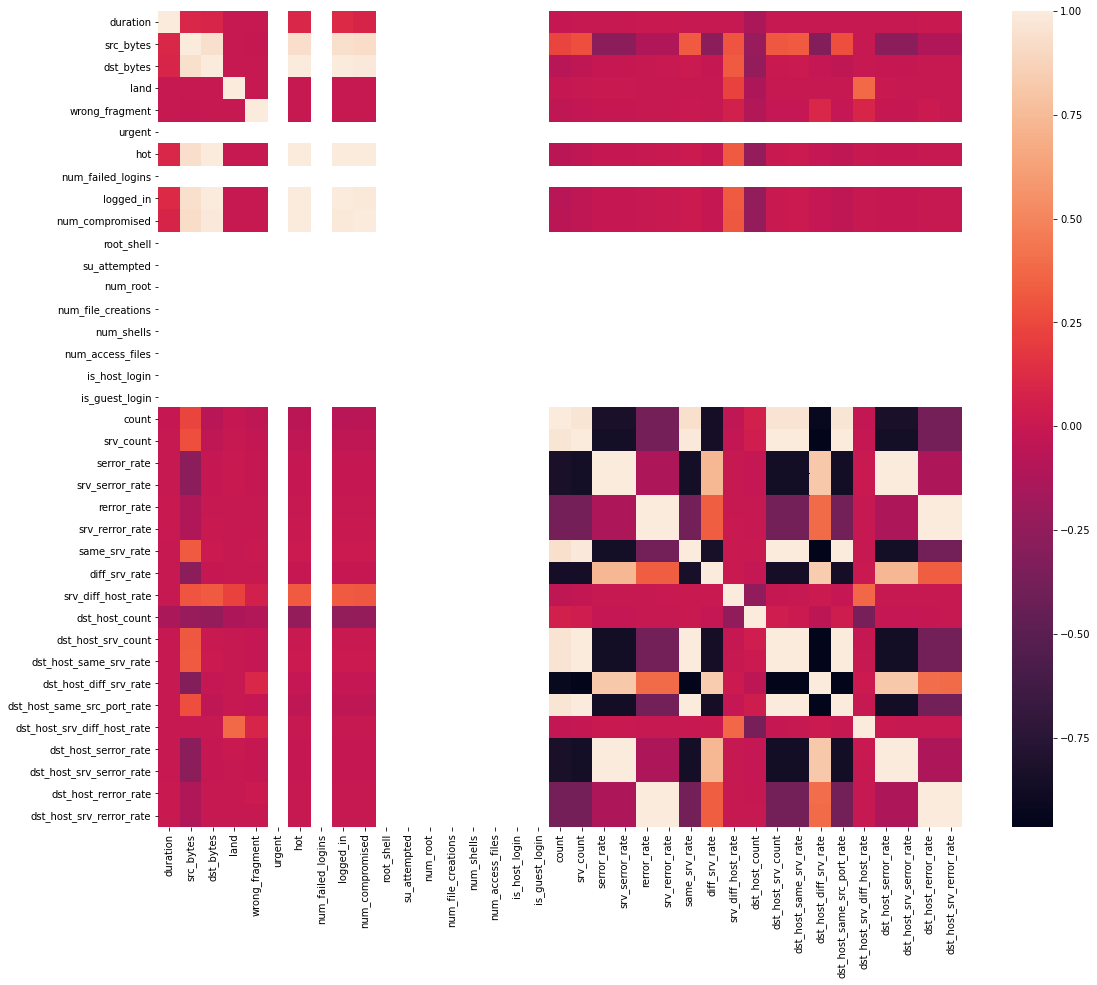

In [37]:
corr = attack_df_dos.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr)#,annot=True
plt.show()

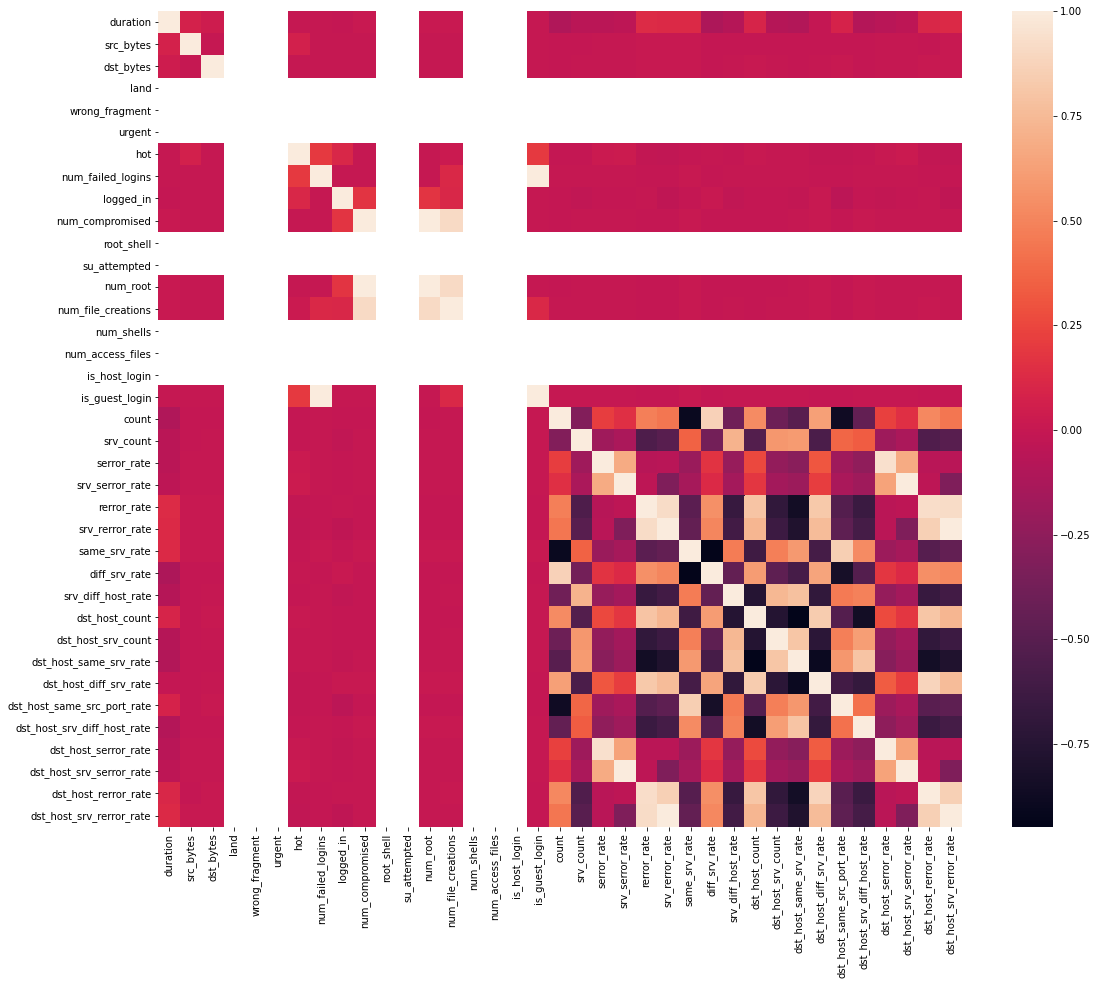

In [38]:
corr = attack_df_probe.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr)#,annot=True
plt.show()

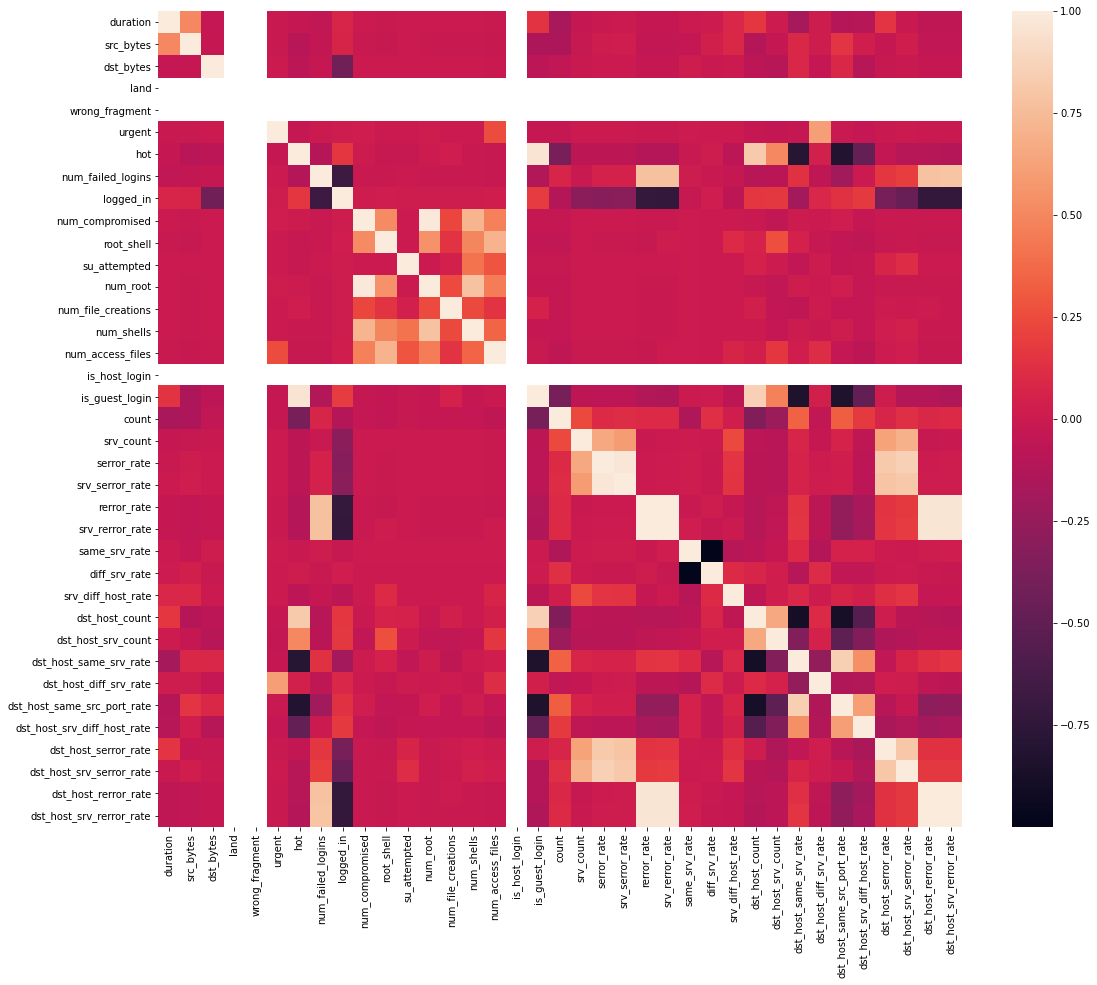

In [39]:
corr = attack_df_r2l.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr)#,annot=True
plt.show()

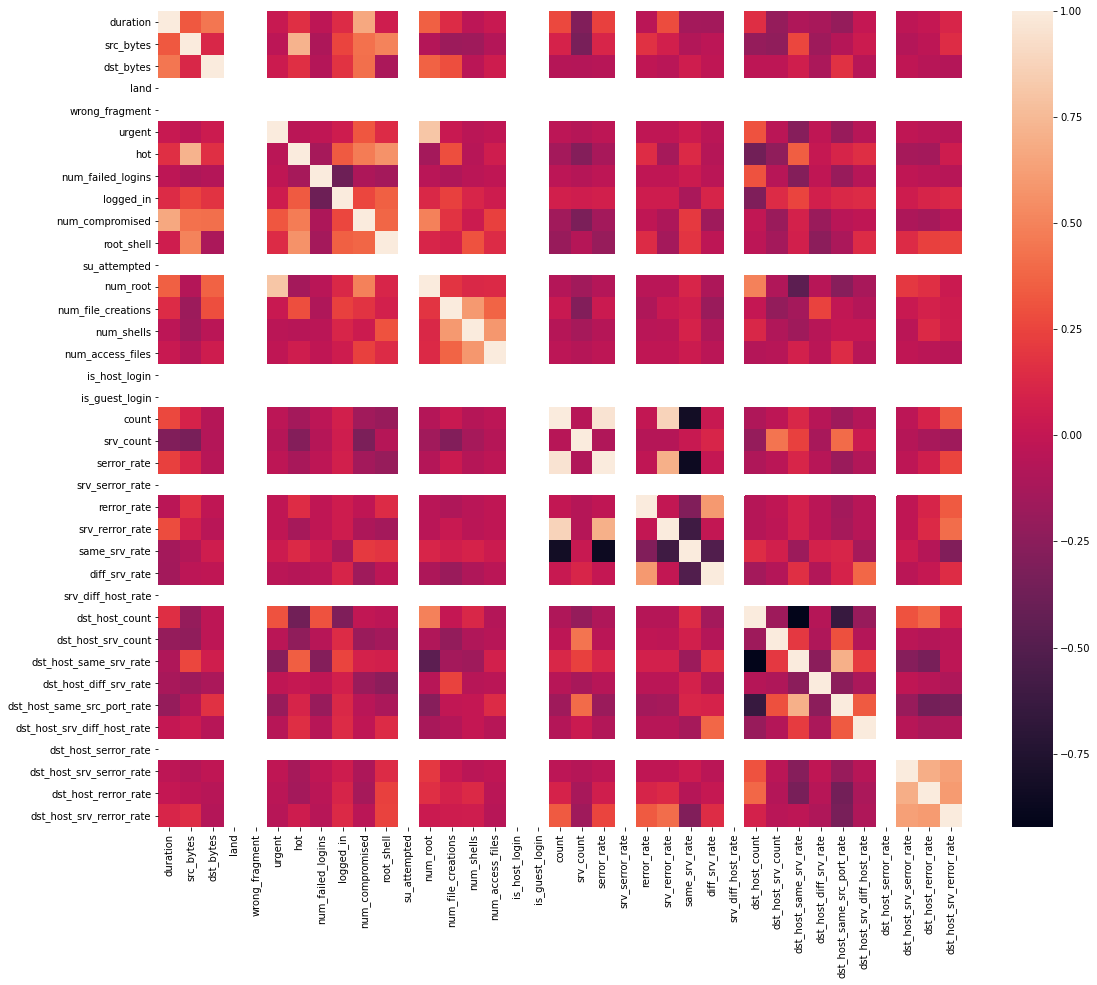

In [40]:
corr = attack_df_u2r.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr)#,annot=True
plt.show()